In [2]:
# Import Memspectrum
from memspectrum import MESA

import numpy as np

np.random.seed(0)

import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
# Making dataset from pedestrian 1 movments 
# Pedestrian 1
person_1_X = [803, 776, 767, 759, 742, 741, 736, 722, 719, 714]

person_1_Y = [1368, 1324, 1295, 1266, 1235, 1217, 1191, 1171, 1154, 1138]

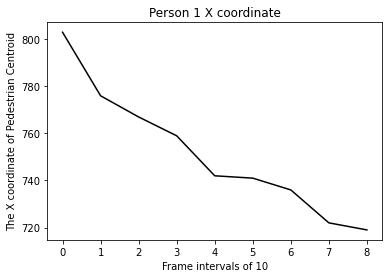

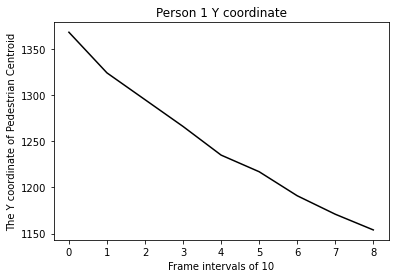

In [4]:
N, dt = 10, 1  # Number of samples and sampling interval
no_pred = 2
time = np.arange(0, N) * dt

plt.plot(time[:-1], person_1_X[:-1], color = 'k')
plt.title("Person 1 X coordinate")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The X coordinate of Pedestrian Centroid")
plt.show()

plt.plot(time[:-1], person_1_Y[:-1], color = 'k')
plt.title("Person 1 Y coordinate")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The Y coordinate of Pedestrian Centroid")
plt.show()

In [5]:
M = MESA()
M.solve(person_1_X[:-no_pred])
forecast = M.forecast(person_1_X[:-no_pred], length = no_pred, number_of_simulations = no_pred*10000, 
include_data = False)
median_X = np.median(forecast, axis = 0) # Ensemble median
average_X = np.average(forecast, axis=0)

In [6]:
M.solve(person_1_Y[:-no_pred])
forecast = M.forecast(person_1_Y[:-no_pred], length = no_pred, number_of_simulations = no_pred*10000, 
include_data = False)
median_Y = np.median(forecast, axis = 0) # Ensemble median
average_Y = np.average(forecast, axis=0)

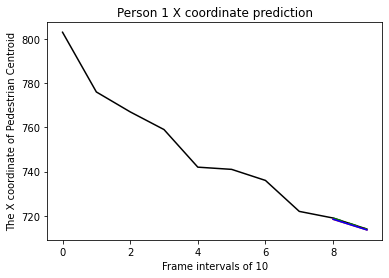

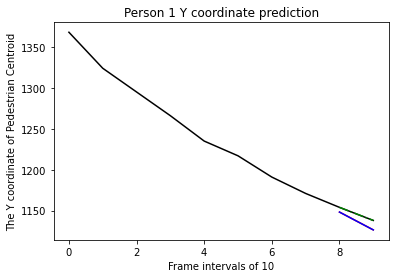

In [7]:
plt.plot(time, person_1_X, color = 'k')
plt.plot(time[N-no_pred:], person_1_X[N-no_pred:], color = 'g', linestyle = '-.', label = 'Observed data')
plt.plot(time[N-no_pred:], median_X, color = 'r', label = 'median estimate')
plt.plot(time[N-no_pred:], average_X, color = 'b', label = 'average estimate')
plt.title("Person 1 X coordinate prediction")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The X coordinate of Pedestrian Centroid")
plt.show()

plt.plot(time, person_1_Y, color = 'k')
plt.plot(time[N-no_pred:], person_1_Y[N-no_pred:], color = 'g', linestyle = '-.', label = 'Observed data')
plt.plot(time[N-no_pred:], median_Y, color = 'r', label = 'median estimate')
plt.plot(time[N-no_pred:], average_Y, color = 'b', label = 'average estimate')
plt.title("Person 1 Y coordinate prediction")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The Y coordinate of Pedestrian Centroid")
plt.show()

In [8]:
# Sum Squared Error just as a quick evaluation
real_X_values = person_1_X[N-no_pred:]
print("Real X Values = ", real_X_values)
real_Y_values = person_1_Y[N-no_pred:]
print("Real Y Values = ", real_Y_values)
print("Median X Values = ", median_X)
print("Average X Value = ", average_X)
print("Median Y Values = ", median_Y)
print("Average Y Value = ", average_Y)
SSE_X = np.sum((real_X_values - median_X)**2)
SSE_Y = np.sum((real_Y_values - median_Y)**2)
SSR_X = np.sum((real_X_values - average_X)**2)
SSR_Y = np.sum((real_Y_values - average_Y)**2)
SST_X = np.sum(SSR_X + SSE_X)
SST_Y = np.sum(SSR_Y + SSE_Y)
print("SSE X = ", SSE_X)
print("SSE Y = ", SSE_Y)
print("SSR X = ", SSR_X)
print("SSR Y = ", SSR_Y)
print("SST X = ", SST_X)
print("SST Y = ", SST_Y)

Real X Values =  [719, 714]
Real Y Values =  [1154, 1138]
Median X Values =  [718.40994312 713.64491328]
Average X Value =  [718.45936919 713.62524274]
Median Y Values =  [1148.25514353 1126.47605252]
Average Y Value =  [1148.2347291  1126.42990328]
SSE X =  0.4742536935574632
SSE Y =  165.80474148696618
SSR X =  0.43272467647141544
SSR Y =  167.10548650030114
SST X =  0.9069783700288787
SST Y =  332.9102279872673


In [9]:
person_1_final_coordinate = [718, 1148]

print ("Person 1 Final Coordinates: ", str(person_1_final_coordinate))

Person 1 Final Coordinates:  [718, 1148]
